# Tensorflow cifar10 example
https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce

In [33]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
import keras
import numpy as np
# Convert the LABELS 0..9 to one-hot
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

# Convert the IMAGE pixels 0.255 to 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [15]:
def label(n):
    return ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"][n]

In [36]:
def print_logits(logits):
    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    index = np.arange(len(logits))
    plt.bar(index, logits, align='center', alpha=0.5)
    plt.xlabel('Classification')
    plt.ylabel('Logits')
    plt.xticks(index,classes,rotation=90)
    plt.title('Neutral network confidence')
    plt.show()


[6]
frog
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


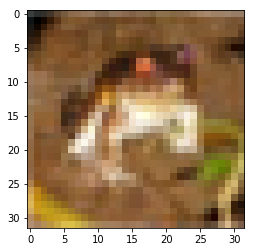

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 0 # You may select anything up to 50,000

print(y_train[image_index])
print(label(y_train[image_index][0])) # The label is 6
print(y_train_one_hot[0])
plt.imshow(x_train[image_index])

In [19]:
print("x_train: ",x_train.shape,"y_train: ",y_train.shape)

x_train:  (50000, 32, 32, 3) y_train:  (50000, 1)


In [20]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [21]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train_one_hot, batch_size=32, epochs=20, validation_split=0.2)

W0726 15:33:44.677020 140514715084608 deprecation.py:323] From /home/ijl20/src/jupyterlab/venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 93s 2ms/sample - loss: 1.5706 - accuracy: 0.4217 - val_loss: 1.2150 - val_accuracy: 0.5623
Epoch 2/20
40000/40000 [==============================] - 94s 2ms/sample - loss: 1.1557 - accuracy: 0.5852 - val_loss: 1.0434 - val_accuracy: 0.6278
Epoch 3/20
40000/40000 [==============================] - 96s 2ms/sample - loss: 0.9901 - accuracy: 0.6490 - val_loss: 0.8961 - val_accuracy: 0.6832
Epoch 4/20
40000/40000 [==============================] - 101s 3ms/sample - loss: 0.8895 - accuracy: 0.6848 - val_loss: 0.8049 - val_accuracy: 0.7156
Epoch 5/20
40000/40000 [==============================] - 109s 3ms/sample - loss: 0.8121 - accuracy: 0.7146 - val_loss: 0.7806 - val_accuracy: 0.7264
Epoch 6/20
40000/40000 [==============================] - 112s 3ms/sample - loss: 0.7519 - accuracy: 0.7360 - val_loss: 0.7571 - val_accuracy: 0.7341
Epoch 7/20
40000/40000 [=============================

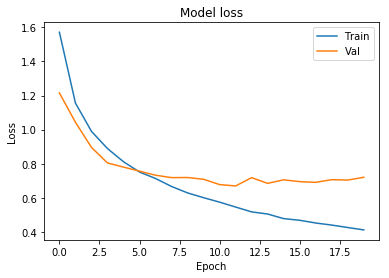

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [26]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'

In [40]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 454us/sample - loss: 0.7523 - accuracy: 0.7701


0.7701

In [41]:
cat = plt.imread("cat.png")

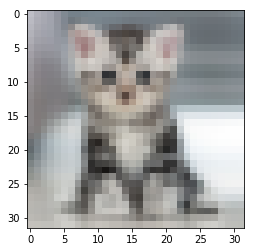

In [42]:
from skimage.transform import resize
cat_resized = resize(cat, (32,32,3))
plt.imshow(cat_resized)

In [43]:
cat_prob = model.predict(np.array( [cat_resized,] ))
print(cat_prob)

[[8.05988268e-04 3.09651514e-05 1.61208138e-02 1.53488114e-01
  1.03488244e-01 2.14210898e-01 7.08677713e-03 5.04412353e-01
  1.78033471e-04 1.77819689e-04]]


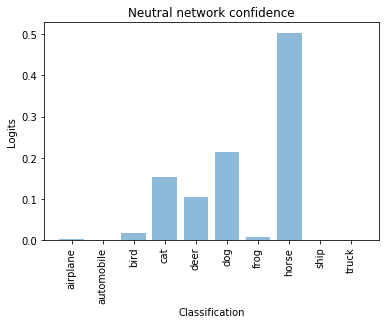

In [44]:
print_logits(cat_prob[0])

In [8]:
image_index = 7800
category_name = ['ZERO','ONE','TWO','THREE','FOUR','FIVE','SIX','SEVEN','EIGHT','NINE']
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

[[ 0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]]
Index 7802 Category: ONE Label: ONE [[ 0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]]


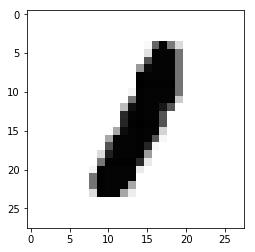

In [10]:
image_index += 1
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred)
print('Index {0} Category: {1} Label: {2} {3}'.format(image_index, category_name[pred.argmax()],category_name[y_test[image_index]], pred))

In [ ]:
from IPython.display import display, Markdown

In [ ]:
display(Markdown('# foo'))